# Sheet 5: Solution

In [3]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exercise 1

(a) See e.g. Lecture Slide for the proof.

\begin{eqnarray*}
\mathcal{1}(\theta)&=&
\sum_{i=1}^N\sum_{k=1}^K 1_{y_i=k} (\log \mathcal{N}(x_i|\mu_k,\Sigma_k) + \log\pi_k)\\
&=&\sum_{k=1}^K \left(\sum_{i | y_i=k} \log \mathcal{N}(x_i|\mu_k,\Sigma_k)\right) + \sum_{k=1}^K N_k\log\pi_{k}
%+ \sum_{i=1}^N\log\pi_{y_i}
\end{eqnarray*}
where:
$$
N_k = \sum_{i=1}^{N} \mathbb{1}(y_i=k)
$$
We take the partial derivative of the above function:
$$
\frac{\partial l(\theta)}{\partial \hat{\pi_k}}=0\space \text{subject to} \sum_{k=1}^K \hat{\pi_k} =1.
$$
With Lagrange multiplier 
$$
\mathcal{L}(\pi_k,\lambda)=\sum_kN_k\log\pi_k-\lambda(\sum_k\pi_k-1)
$$
$$
\frac{\partial}{\partial{\pi_k}}\sum_kN_k\log\pi_k=\lambda\frac{\partial}{\partial{\pi_k}}(\sum_k\pi_k-1)
$$
$$
\frac{N_k}{\pi_k}=\lambda \forall k\in{1,...,K}
$$
, we get:
$$
\hat{\pi_k}=\frac{N_k}{N}
$$
Similarly, we set 

$$
\frac{\partial l(\theta)}{\partial \hat{\mu_k}}=0 =>\hat\mu_k  = \frac{1}{N_k} \sum_{i=1}^{N} \mathbb{1}(y_i=k) x_i
$$
$$
\frac{\partial l(\theta)}{\partial \hat{\sigma_k}}=0 =>\hat\Sigma_k = \frac{1}{N_k} \sum_{i=1}^{N} (x_i - \hat\mu_k)(x_i - \hat\mu_k)^T \mathbb{1}(y_i=k)
$$


Clearly, these are closed-form solutions, which are easy to compute.

(b) GDA models the full probability distribution $P(y,x)$ of output $G$ and features $X$. Linear regression for classification (a more advanced version will be logistic regression) only models $P(g|x)$, that is, assumes the values of the features $X$ to be given. The former is able can be used to sample the complete data (generative model), while the latter is not able to do so (discriminative model). 

If the data is Gaussian distributed, the stronger restriction of GDA will allow to obtain a lower variance in the predicition error (better performance) given the same amount of training data. If the data is not Gaussian, the higher flexibility of the logit regression will usually allow to obtain better results. There would be many further issues to mention here, one of the most important is that GDA can be easily adapted to the unsupervised case, whereas logit regression cannot.

## Exercise 2

In [4]:
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.25], [0.83, 0.23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

def dataset_varying_cov():
    '''Generate 2 Gaussians samples with different covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.25], [0.83, 0.23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), np.transpose(C)) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


In [6]:
C1 = np.array([[0., -0.25], [0.83, 0.23]])
sigma1 = np.transpose(C1).dot(C1)
print('sigma1\n',sigma1)
C2 = np.transpose(C1)
sigma2 = np.transpose(C2).dot(C2)
print('sigma2\n',sigma2)

sigma1
 [[0.6889 0.1909]
 [0.1909 0.1154]]
sigma2
 [[ 0.0625 -0.0575]
 [-0.0575  0.7418]]


In [7]:
X,y = dataset_varying_cov()

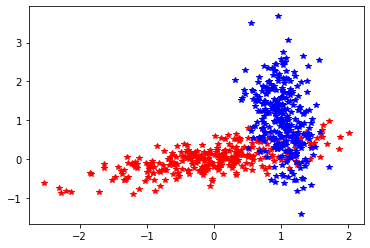

In [8]:
plt.plot(X[y==0,0],X[y==0,1],'r*')
plt.plot(X[y==1,0],X[y==1,1],'b*')

In [9]:
from matplotlib import colors
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot

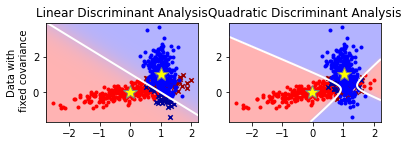

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)
splot = plot_data(lda, X, y, y_pred, fig_index= 1)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)
splot = plot_data(qda, X, y, y_pred, fig_index= 2)

## Exercise 3

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
features, target = load_wine(return_X_y=True)
# Make a train/test split using 30% test size
RANDOM_STATE=40
Xtrain, Xtest, ytrain, ytest = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

In [ ]:
Xtrain_mean = np.mean(Xtrain)
Xtrain_std = np.std(Xtrain)
# Scale training data to have zero mean and unit variance (standard derivation)
Xtrain = (Xtrain-Xtrain_mean)/Xtrain_std

# Scale testing data using training mean and trainig standard derivation
Xtest = (Xtest-Xtrain_mean)/Xtrain_std

In [ ]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
fit_lda = lda.fit(Xtrain, ytrain)
X_lda = fit_lda.transform(Xtrain)

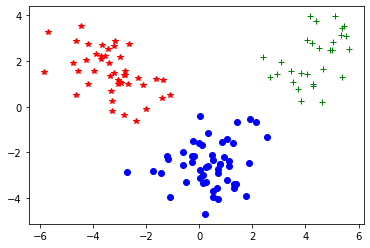

In [ ]:
plt.plot(X_lda[ytrain==0,0],X_lda[ytrain==0,1],'r*') # make a scatterplot
plt.plot(X_lda[ytrain==1,0],X_lda[ytrain==1,1],'bo') # make a scatterplot
plt.plot(X_lda[ytrain==2,0],X_lda[ytrain==2,1],'g+') # make a scatterplot

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit(Xtrain).transform(Xtrain)

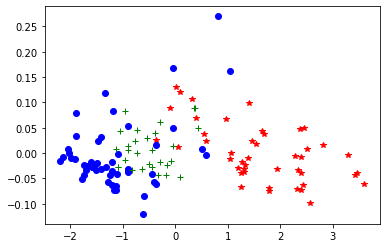

In [ ]:
plt.plot(X_pca[ytrain==0,0],X_pca[ytrain==0,1],'r*') # make a scatterplot
plt.plot(X_pca[ytrain==1,0],X_pca[ytrain==1,1],'bo') # make a scatterplot
plt.plot(X_pca[ytrain==2,0],X_pca[ytrain==2,1],'g+') # make a scatterplot

The purpose of linear discriminant analysis (LDA) in this example is to find the linear combinations of the original variables (the 13 chemical concentrations here) that gives the best possible separation between the groups (wine cultivars here) in our data set. Linear discriminant analysis is also known as “canonical discriminant analysis”, or simply “discriminant analysis”.

If we want to separate the wines by cultivar, the wines come from three different cultivars, so the number of groups $G=3$, and the number of variables is 13 (13 chemicals’ concentrations; $p=13$). The maximum number of useful discriminant functions that can separate the wines by cultivar is the minimum of $G−1$
and $p$, and so in this case it is the minimum of 2 and 13, which is 2. Thus, we can find at most 2 useful discriminant functions to separate the wines by cultivar, using the 13 chemical concentration variables.
For futher explanation, please refer to http://multivariatestatsjl.readthedocs.io/en/latest/mclda.html